![header](https://i.imgur.com/I4ake6d.jpg)

# IN SITU BLACK SEA TRAINING

<div style="text-align: right"><i> 13-04-Part-four-out-of-five </i></div>

***
# BS `NRT` product/dataset: managing files (profilers)

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Profilers-(PF)-data" data-toc-modified-id="3.-Profilers-(PF)-data">3. Profilers (PF) data</a></span>
            <ul>
                <li><span><a href="#3.1.-Reading-the-file" data-toc-modified-id="3.1.-Reading-the-file">3.1. Reading the file</a></span></li>
                <li><span><a href="#3.2.-Data-visualization" data-toc-modified-id="3.2.-Data-visualization">3.2. Data visualization</a></span>
                    <ul>
                        <li><span><a href="#3.2.1.-Trajectory-animation" data-toc-modified-id="3.2.1.-Trajectory-animation">3.2.1. Trajectory animation</a></span></li>
                        <li><span><a href="#3.2.2.-1D-profile" data-toc-modified-id="3.2.2.-1D-profile">3.2.2. 1D profile</a></span></li>
                        <li><span><a href="#3.2.3.-2D-profile" data-toc-modified-id="3.2.3.-2D-profile">3.2.3. 2D profile</a></span></li>
                        <li><span><a href="#3.2.4.-3D-profile" data-toc-modified-id="3.2.4.-3D-profile">3.2.4. 3D profile</a></span></li>
                    </ul>
                </li>
           </ul>
        </li>
        <li><span><a href="#4.-Wrap-up" data-toc-modified-id="4.-Wrap-up">4. Wrap-up</a></span></li>
    </ul>
</div>

***

## 1. Introduction

According to the [13-01-NearRealTtime-product-collections-overview.ipynb](13-01-NearRealTtime-product-collections-overview.ipynb) one of the data source types available are Profilers. Please use the notebook [13-02-NearRealTtime-product-subsetting-download](13-02-NearRealTtime-product-subsetting-download.ipynb) to download some files from Profilers ('PF' data type) and let's check its data. If you wanna skip the downloading part you can use the netCDF files available `/data/files/PF` instead.  

## 2. Setup

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import datetime
import pandas as pd
import os
import numpy as np
import xarray
import matplotlib.pyplot as plt
from matplotlib import colors
import folium
from folium import plugins
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell in the notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![region.png](img/errorImporting.gif)
</div>

## 3. Profilers (PF) data

Profilers are floating devices that are released into the ocean in other to measure a number of variables such as temperature and salinity. It drifts along the currents and sinks every now and then in the watter column to retrieve the variation of such parameters along the depth (profiles!).

<br>Here a self explanatory video from the Argo program:  `run the next cell`

In [2]:
iframe = '<iframe width="100%" height="400" src="https://www.youtube.com/embed/WGbanFvBX38" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'
IPython.display.HTML(iframe)

Let's see the data of one of the available profilers in the IBI Seas.

### 3.1. Reading the file

`Run the next cell` to see the profilers files already available in the /data folder:

In [3]:
dir_PF = os.path.join(os.getcwd(),'data','files','PF') 
os.listdir(dir_PF)

['GL_PR_PF_6901834.nc',
 'GL_PR_PF_3901855.nc',
 'GL_PR_PF_7900591.nc',
 'GL_PR_PF_3901852.nc',
 'GL_PR_PF_6903240.nc',
 'GL_PR_PF_3901854.nc',
 'GL_PR_PF_7900595.nc',
 'GL_PR_PF_6901833.nc',
 'GL_PR_PF_6901831.nc',
 'GL_PR_PF_6901832.nc']

`Set one` of the above available `file name` and `run the next cells`:

In [4]:
file = 'GL_PR_PF_3901852.nc'
path = os.path.join(os.getcwd(), 'data','files','PF', file)

In [5]:
ds = xarray.open_dataset(path)
ds.close()
ds

<xarray.Dataset>
Dimensions:                   (DEPTH: 143, LATITUDE: 437, LONGITUDE: 437, POSITION: 437, TIME: 437)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2016-12-06T22:22:00 ... 2...
  * LATITUDE                  (LATITUDE) float32 42.18 42.14 ... 44.29 44.29
  * LONGITUDE                 (LONGITUDE) float32 29.34 29.41 ... 32.17 32.17
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DATA_MODE                 (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    PRES_QC                   (TIME, DEPTH) float32 ...
    TEMP                      (TIME, DEPTH) float64 ...
    TEMP_QC                   (TIME, DEPTH) float32 ...
    PSAL                      (TIME, DEPTH) float64 ...
    PSAL_QC                   (TIME, DEPTH) float32 ...
    PRES_ADJUSTED             (TIME, DEPTH) float32 ...
    PRES_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PRES_ADJUSTED_ERROR       (TIME, DEPTH) float32 ...
    TEMP_ADJUSTED             (TIME, DEPTH) float64 ...
    TEMP_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    TEMP_ADJUSTED_ERROR       (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PSAL_ADJUSTED_ERROR       (TIME, DEPTH) float64 ...
Attributes:
    data_type:                      OceanSITES vertical profile
    format_version:                 1.2
    platform_code:                  3901852
    date_update:                    2020-03-01T22:25:28Z
    institution:                    Institute of Marine Sciences  Middle East...
    institution_edmo_code:          696
    site_code:                       
    wmo_platform_code:              3901852
    coriolis_platform_code:         3901852
    platform_name:                  ARVOR-I Profiling Float
    wmo_inst_type:                  844
    source:                         drifting subsurface profiling float
    source_platform_category_code:  46
    history:                        2020-03-01T22:25:28Z : Creation
    data_mode:                      M
    quality_control_indicator:      6
    quality_index:                  A
    references:                     http://marine.copernicus.eu,http://www.co...
    comment:                         
    Conventions:                    CF-1.6 OceanSITES-Manual-1.2 Copernicus-I...
    netcdf_version:                 netCDF-4 classic model
    title:                          Global Ocean - In Situ Observation Copern...
    summary:                         
    naming_authority:               OceanSITES
    id:                             GL_PR_PF_3901852
    cdm_data_type:                  vertical profile
    family_label:                   profiler-glider
    family_code:                    PF
    area:                           Global Ocean
    geospatial_lat_min:             41.25592
    geospatial_lat_max:             44.52791
    geospatial_lon_min:             29.34005
    geospatial_lon_max:             39.82808
    geospatial_vertical_min:        0.00
    geospatial_vertical_max:        1529.90
    time_coverage_start:            2016-12-06T22:22:00Z
    time_coverage_end:              2020-02-26T12:01:30Z
    institution_references:          
    contact:                        codac@ifremer.fr
    author:                         Coriolis and Copernicus data provider
    data_assembly_center:           Coriolis
    pi_name:                        Pierre-Marie Poulain
    distribution_statement:         These data follow Copernicus standards; t...
    citation:                       These data were collected and made freely...
    update_interval:                daily
    qc_manual:                      OceanSITES User's Manu

The above one is an overview of the content of the file: variables, dimensions, coordinates, global attributes...
<br>Let's list now the available variables: `run the next cell`

In [6]:
for var in ds.variables:
    print(var + ':' + ds[var].attrs['long_name'])

TIME:Time
TIME_QC:quality flag
LATITUDE:Latitude of each location
LONGITUDE:Longitude of each location
POSITION_QC:quality flag
DC_REFERENCE:Station/Location unique identifier in data centre
DATA_MODE:Delayed mode or real time data
DIRECTION:Direction of the profiles
VERTICAL_SAMPLING_SCHEME:Vertical sampling scheme
PRES:Sea pressure
PRES_QC:quality flag
TEMP:Sea temperature
TEMP_QC:quality flag
PSAL:Practical salinity
PSAL_QC:quality flag
PRES_ADJUSTED:Sea pressure adjusted
PRES_ADJUSTED_QC:quality flag
PRES_ADJUSTED_ERROR:Sea pressure adjusted error
TEMP_ADJUSTED:Sea temperature adjusted
TEMP_ADJUSTED_QC:quality flag
TEMP_ADJUSTED_ERROR:Sea temperature adjusted error
PSAL_ADJUSTED:Practical salinity adjusted
PSAL_ADJUSTED_QC:quality flag
PSAL_ADJUSTED_ERROR:Practical salinity adjusted error


### 3.2. Data visualization

Let's focus on one of the above variables to visualize its data!: `set one and run the next cell`

In [7]:
param = 'TEMP_ADJUSTED'

In [8]:
ds[param]

<xarray.DataArray 'TEMP_ADJUSTED' (TIME: 437, DEPTH: 143)>
array([[10.912001, 10.909001, 10.891001, ...,       nan,       nan,       nan],
       [10.707001, 10.708001, 10.701001, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [ 8.414   ,  8.412   ,       nan, ...,       nan,       nan,       nan],
       [ 8.458   ,  8.458   ,  8.453   , ...,  9.04    ,  9.042   ,       nan],
       [ 8.46    ,  8.458   ,       nan, ...,       nan,       nan,       nan]])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2016-12-06T22:22:00 ... 2020-02-26T12:01:30
Dimensions without coordinates: DEPTH
Attributes:
    units:          degrees_C
    long_name:      Sea temperature adjusted
    standard_name:  sea_water_temperature

#### 3.2.1. Trajectory animation

As stated before, the profilers are mobile platforms. <br>Let's check the overall trajectory by joining the sampling points (locations where a profile has been performed).

In In Situ TAC netCDFs all variables are linked to another called the same plus '_QC'. This 'twin' variable contains a quality flag for each value in the paired variable.`run the next cell` to check the flag values convention:

In [9]:
pd.DataFrame(data=ds['POSITION_QC'].attrs['flag_values'],
             index=ds['POSITION_QC'].attrs['flag_meanings'].split(' '), columns=['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


Users are recommended to use only the data flagged as 1, they so called 'good data'. Let's then check the available flags for the coordinates (time and position) to see if we need to get rid of not-good values: `run the next cells`

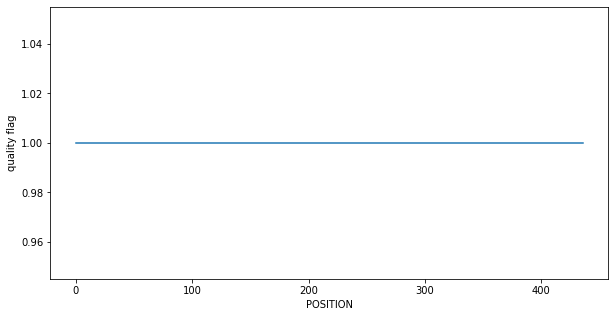

In [10]:
ds['POSITION_QC'].plot(aspect=2, size=5)

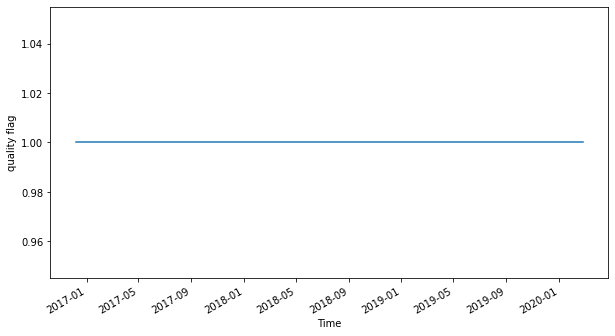

In [11]:
ds['TIME_QC'].plot(aspect=2, size=5)

From above, we see no flags values different from 1, so we are ready to go!. Be aware nevertheless, that in the event of other flags values, a selection of the data must be done. See next how:`run the next cell`

In [12]:
lats = ds['LATITUDE'].where(ds['POSITION_QC'] == 1).values.tolist()
lats = [i[0] for i in lats]
lons = ds['LONGITUDE'].where(ds['POSITION_QC'] == 1).values.tolist()
lons = [i[1] for i in lons]
times = ds['TIME'].where(ds['TIME_QC'] == 1).values.tolist()
strtimes = ds['TIME'].where(ds['TIME_QC'] == 1).values[:]

Let's initialize now a geojson object that will represent our profiler: `run the next cell`

In [13]:
profiler = {
    'type': 'Feature',
    'geometry': {
        'type': 'LineString',
        'coordinates': []#to be populated with lat,lon pairs
    },
    'properties': {
        'times': [] #to be populed with time strings
    }
}

Let's now popule it: `run the next cell`

In [14]:
for time, strtime, lat, lon in zip(times, strtimes, lats, lons):
    base = [time,lat,lon]
    if(any(x is None for x in base)):
        continue
    if(any(np.isnan(x) for x in base)):
        continue
    profiler['properties']['times'].append(str(strtime)[:22])
    profiler['geometry']['coordinates'].append([lon, lat])

Let's now create a map to finally see the overall trajectory performed by the profiler:

In [15]:
mean_lat, mean_lon = np.mean(lats), np.mean(lons)
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': [profiler],
}, period='P1D', add_last_point=True, loop=False).add_to(m)
m

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you do not see any map when running the next cell please change your navigator (try chrome!).
</div>

#### 3.2.2. 1D profile

Let's see the selected variable variation with depth in a specific time/position..

Set first cell the profile to check (`run the next cell`): 

In [16]:
idx = 0 #First profile

Set a title for the plot (`run the next cell`):

In [17]:
title = 'Profile from platform '+ds.platform_code+\
    ' \n time('+str(ds['TIME'].values[idx])[:19]+') '+\
    '& position('+str(ds['LATITUDE'].values[idx])+','+str(ds['LONGITUDE'].values[idx])+')'

Create plot (`run the next cell`):

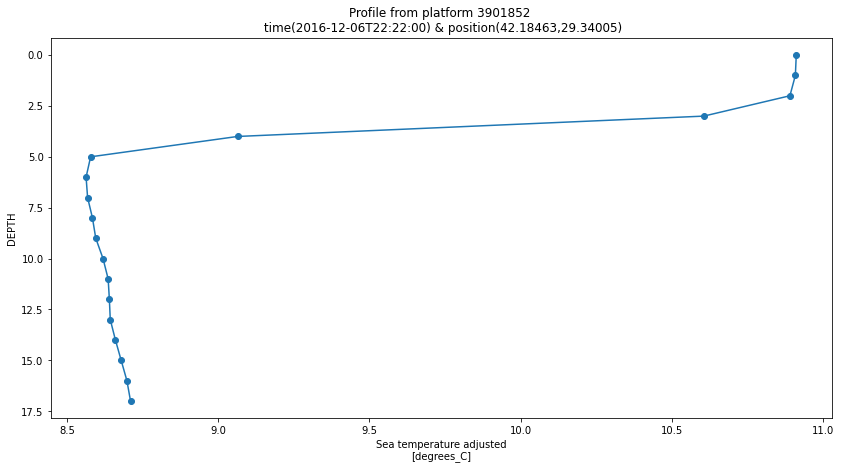

In [18]:
ds[param][idx].where(ds[param+'_QC'][idx]==1).plot.line(aspect=2, size=7, marker='o',y='DEPTH')
plt.title(title)
plt.gca().invert_yaxis()

#### 3.2.3. 2D profile

Let's plot the selected variable variation with time and depth (no matter the position)!

Set a new title (`run the next cell`):

In [19]:
title = '2D Profile from platform '+ds.platform_code+\
    ' \n times('+str(ds['TIME'].values[0])[:19]+' / '+str(ds['TIME'].values[-1])[:19]+') '

Create a 2D plot (`run the next cell`):

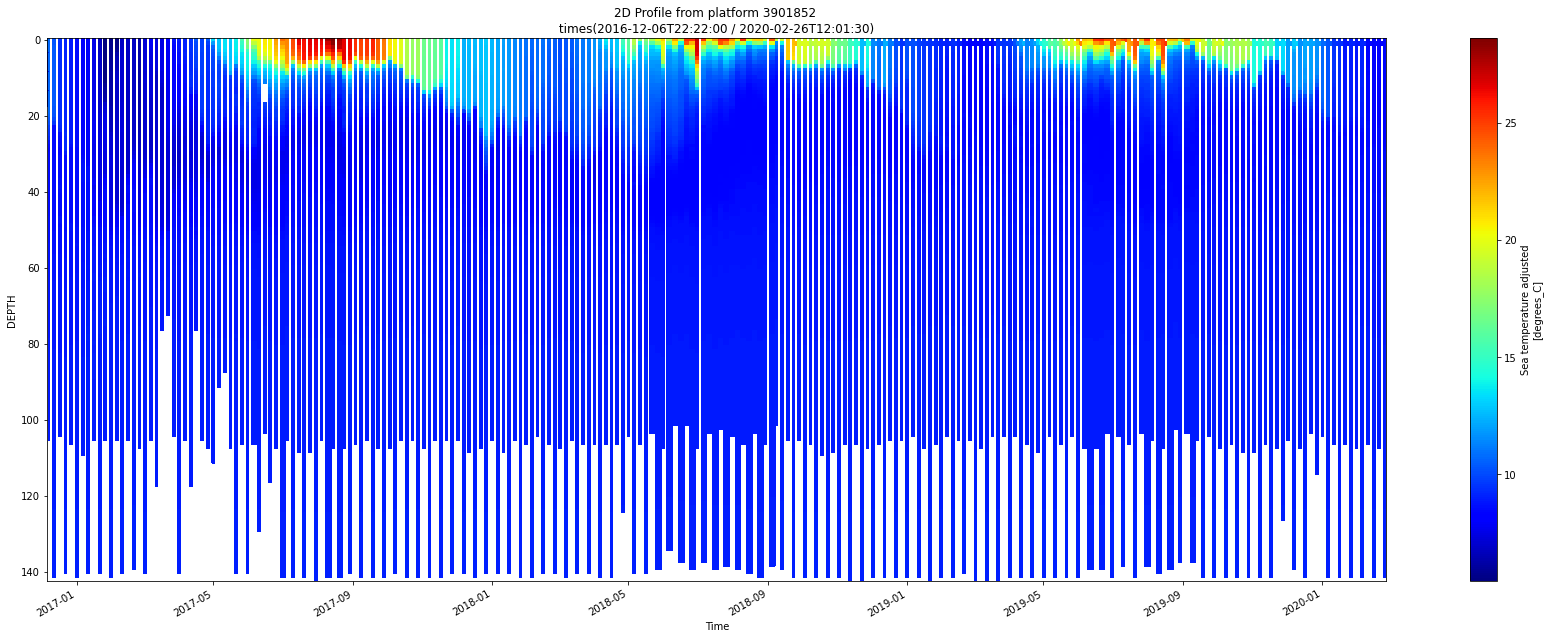

In [20]:
ds[param].where(ds[param+'_QC'] == 1).plot(
    x='TIME', y='DEPTH', aspect=3, size=10, cmap='jet')
plt.title(title)
plt.gca().invert_yaxis()

#### 3.2.4. 3D profile

Let's plot the selected variable variation with time, depth and position!

Set first a colormap (`run the next cell`):

In [21]:
cmap = plt.cm.Spectral_r
norm = colors.Normalize(vmin=ds[param].where(ds[param+'_QC'] == 1).min(
).values.tolist(), vmax=ds[param].where(ds[param+'_QC'] == 1).max().values.tolist())

Specify the list of profiles to plot (`run the next cell`):

In [22]:
profiles2plot = range(0, len(ds['TIME'])) #Defaults to all!
profiles2plot

range(0, 437)

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***  
If you face any problem with the next plot, try reducing the number of `profiles2plot`
</div>

Create the 3D plot (`run the next cell`):

Text(0.5, 0, 'longitude')

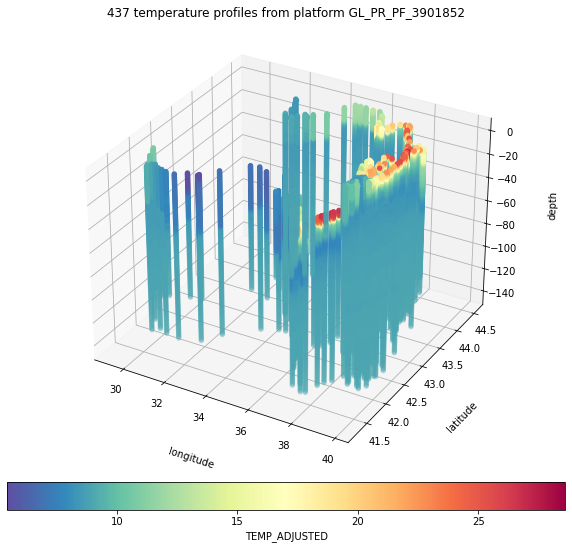

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for a in profiles2plot:
    lat = ds['LATITUDE'].values.tolist()[a]
    lon = ds['LONGITUDE'].values.tolist()[a]
    temp = ds[param].where(ds[param+'_QC'] == 1).values.tolist()[a]
    depth = (-1*ds['DEPTH']).values.tolist()
    plt.scatter(lon*np.ones(len(depth)), lat*np.ones(len(depth)), zs=depth, zdir='z', s=20, c=temp, cmap=cmap, norm=norm)
cbar = plt.colorbar(orientation="horizontal", pad=0.02)
cbar.ax.set_xlabel(param)
ax.set_title(str(a+1)+' temperature profiles from platform ' + ds.id, y=1.08)
ax.set_zlabel('depth', labelpad=20, rotation=90)
ax.set_ylabel('latitude', labelpad=20)
ax.set_xlabel('longitude', labelpad=20)

***

## 4. Wrap-up

So far you should already know how to deal with profile-like data from profilers platforms. <br> `If you don't please ask us! it is the moment!`